### 1 Readying Clauses

Firstly we specify n, which for the partial solution test is 5.

In [3]:
n=5
round_balls=False

#### Importing Clauses and Gardams unit

In [5]:
import ast #helps to change string into list below

In [6]:
if not round_balls:
    f = open(f"clauses_{n}.txt","r")
    clauses=ast.literal_eval(f.read())
if round_balls:
    f = open(f"clauses_round_{n}.txt","r")
    clauses=ast.literal_eval(f.read())

In [7]:
len(clauses)

144873

In [8]:
g = open("clauses_unit_Gardam.txt","r")
clauses_unit_Gardam=ast.literal_eval(g.read())

In [9]:
print(clauses_unit_Gardam)

[[1], [5], [93], [84], [67], [143], [89], [64], [3], [118], [20], [83], [68], [31], [49], [66], [56], [61], [58], [80], [26]]


In [58]:
h = open("clauses_inverse_Gardam.txt","r")
clauses_inverse_Gardam=ast.literal_eval(h.read())

### 2 starting SAT - all clauses added

In the following line I import a solver. Note that at the moment Minisat22 is chosen as Solver, but that this can be changed without changing anything else in the document - syntax seems to be consistent across solvers

In [12]:
from pysat.solvers import Glucose3 as Solver

In [13]:
s=Solver()
s.append_formula(clauses)
s.append_formula(clauses_unit_Gardam)

In [14]:
import time

In [15]:
time0=time.time()
value=s.solve()
time_spent=time.time()-time0
print(value)
print(time_spent)

True
4639.355983018875


In [29]:
if value==False:
    print(s.get_core())
else:
    model=s.get_model()
    [i for i in model if i>0]

In [33]:
print([i for i in model if i>0 and i<148])

[1, 3, 5, 20, 26, 31, 49, 56, 58, 61, 64, 66, 67, 68, 80, 83, 84, 89, 93, 118, 143]


In [37]:
print([i for i in model if i>147 and i<2*147+1])

[148, 172, 174, 185, 186, 190, 191, 201, 219, 222, 225, 237, 238, 239, 255, 259, 279, 283, 286, 288, 294]


In [42]:
time_spent/60 #in minutes

77.32259971698126

Seeing that SAT finds the same inve

In [66]:
print(sorted([w[0] for w in clauses_inverse_Gardam]))

[148, 172, 174, 185, 186, 190, 191, 201, 219, 222, 225, 237, 238, 239, 255, 259, 279, 283, 286, 288, 294]


In [68]:
sorted([w[0] for w in clauses_inverse_Gardam])==[i for i in model if i>147 and i<2*147+1]

True

This test shows that Gardams unit could be found by the script, had it been allowed to run

### 3 Timed partial SAT runs

Noting that SAT spent 77min running, what to us seems like a full solution, one might be vary of running SAT with fewer clauses added. We can also note that SAT indeed also had to 'find' the inverse and check all requirements. Firstly, one might instead try to run SAT, where the clauses from the inverse are also added - is this quicker?

In [127]:
t=Solver()
t.append_formula(clauses)
t.append_formula(clauses_unit_Gardam)
t.append_formula(clauses_inverse_Gardam)

In [129]:
time0=time.time()
value=t.solve()
time_list=[time.time()-time0]
print(value1)
print(time_list)

True
[15.337615728378296]


Okay, this is definetly quicker.

So, maybe we should try from there, adding fewer clauses

In [133]:
for i in range(1,22):
    t=Solver()
    t.append_formula(clauses)
    t.append_formula(clauses_unit_Gardam)
    t.append_formula(clauses_inverse_Gardam[:-i])
    time0=time.time()
    value=t.solve()
    time_list.append(time.time()-time0)
    print(value,time_list[-1])
print(time_list)

True 28.00450897216797
True 24.531900882720947
True 22.29439902305603
True 30.15378189086914
True 32.581839084625244
True 41.22639322280884
True 54.43191194534302
True 66.77655982971191
True 64.05849862098694
True 125.92452812194824
True 141.4709849357605
True 137.63201689720154
True 177.15906405448914
True 337.2908799648285
True 336.0859680175781
True 418.6995348930359
True 678.8079330921173
True 878.5238809585571
True 1238.7904839515686
True 4616.964509010315
True 5639.923819065094
[15.337615728378296, 28.00450897216797, 24.531900882720947, 22.29439902305603, 30.15378189086914, 32.581839084625244, 41.22639322280884, 54.43191194534302, 66.77655982971191, 64.05849862098694, 125.92452812194824, 141.4709849357605, 137.63201689720154, 177.15906405448914, 337.2908799648285, 336.0859680175781, 418.6995348930359, 678.8079330921173, 878.5238809585571, 1238.7904839515686, 4616.964509010315, 5639.923819065094]


In [135]:
5639/60

93.98333333333333

Now, plotting:

In [2]:
import matplotlib.pyplot as plt

In [20]:
number=list(range(42,20,-1))
time=[15.337615728378296, 28.00450897216797, 24.531900882720947, 22.29439902305603, 30.15378189086914, 32.581839084625244, 41.22639322280884, 54.43191194534302, 66.77655982971191, 64.05849862098694, 125.92452812194824, 141.4709849357605, 137.63201689720154, 177.15906405448914, 337.2908799648285, 336.0859680175781, 418.6995348930359, 678.8079330921173, 878.5238809585571, 1238.7904839515686, 4616.964509010315, 5639.923819065094]

In [22]:
len(number)

22

In [24]:
len(time)

22

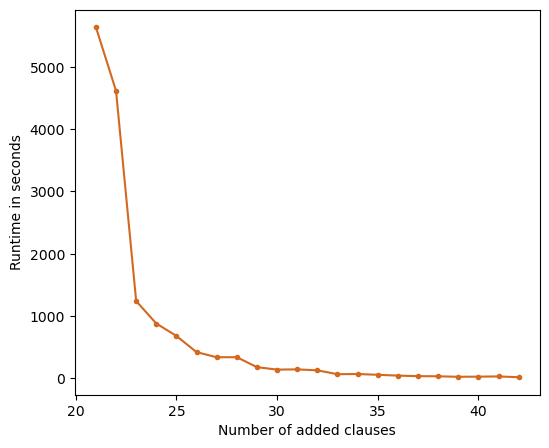

In [38]:
plt.figure(figsize=(6, 5))
plt.plot(number, time, color='chocolate', marker='.')
plt.xlabel('Number of added clauses')
plt.ylabel('Runtime in seconds')
plt.savefig('partial_solutions.png', dpi=300, bbox_inches=None)
plt.show()